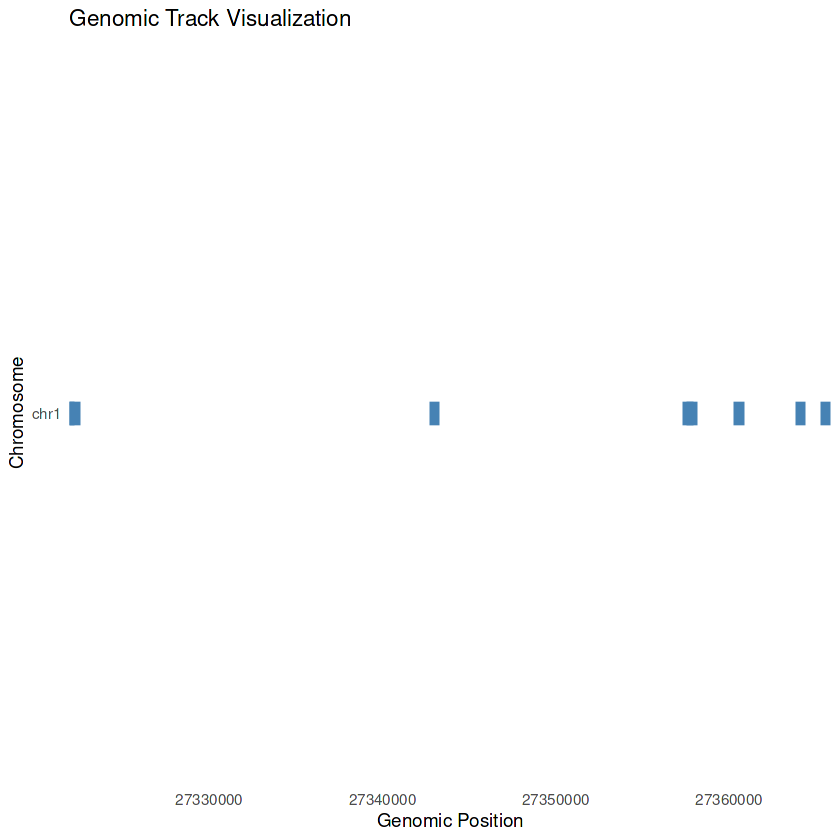

In [23]:
# Load necessary libraries
library(rtracklayer)
library(ggplot2)

# Define the path to your BigBed file
bigbed_file <- "/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_1/bedtracks/ctcfbed/ENCFF088XXV.bigBed"
#bigbed_file <- "/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/K562/ATAC_temp/K562_unstranded_scaled.bw"
# Import the BigBed file as a GenomicRanges object
range="chr1:27315972-27367998"
REGION = GRanges(range)

granges <- import(bigbed_file, which=REGION)

#xtract chromosome, start, and end as vectors
chromosome <- as.vector(seqnames(granges))  # Chromosome names
start_pos <- as.vector(start(granges))      # Start positions
end_pos <- as.vector(end(granges))          # End positions

# Combine extracted vectors into a matrix if needed
# Here, we'll use a dataframe to make it compatible with ggplot2
track_data <- data.frame(
  chromosome = chromosome,
  start = start_pos,
  end = end_pos
)

# Plot using ggplot2
ggplot(track_data) +
  geom_segment(aes(x = start, xend = end, y = chromosome, yend = chromosome),
               size = 5, color = "steelblue") +
  labs(title = "Genomic Track Visualization", x = "Genomic Position", y = "Chromosome") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  coord_cartesian(expand = FALSE)

# print(granges)
# # Extract necessary columns as vectors
# chromosome <- as.vector(seqnames(granges)) # Chromosome names
# start_pos <- as.vector(start(granges))     # Start positions
# end_pos <- as.vector(end(granges))         # End positions

# # Convert GRanges to a matrix (alternative way to get data)
# # Each row corresponds to a feature with columns: seqnames, start, end, width, strand
# granges_matrix <- as.matrix(granges)

# # Creating a ggplot with vectors for chromosomes and start-end positions
# ggplot() +
#   geom_segment(aes(x = start_pos, xend = end_pos, y = chromosome, yend = chromosome),
#                size = 1, color = "steelblue") +
#   labs(title = "Genomic Track Visualization", x = "Genomic Position", y = "Chromosome") +
#   theme_minimal() +
#   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
#   coord_cartesian(expand = FALSE)

In [19]:
granges_matrix <- as.vector(as.matrix(granges))
#granges

GRanges object with 5 ranges and 6 metadata columns:
      seqnames            ranges strand |        name     score signalValue
         <Rle>         <IRanges>  <Rle> | <character> <integer>   <numeric>
  [1]     chr1 27332739-27333200      * |           .      1000    258.4734
  [2]     chr1 27351357-27351569      * |           .      1000     68.0895
  [3]     chr1 27351502-27351926      * |           .       841     24.9617
  [4]     chr1 27357481-27357876      * |           .      1000    302.7661
  [5]     chr1 27366528-27366758      * |           .      1000     70.0710
         pValue    qValue      peak
      <numeric> <numeric> <integer>
  [1]        -1   4.65032       233
  [2]        -1   4.65032       152
  [3]        -1   4.06247       212
  [4]        -1   4.65032       200
  [5]        -1   4.65032       104
  -------
  seqinfo: 23 sequences from an unspecified genome

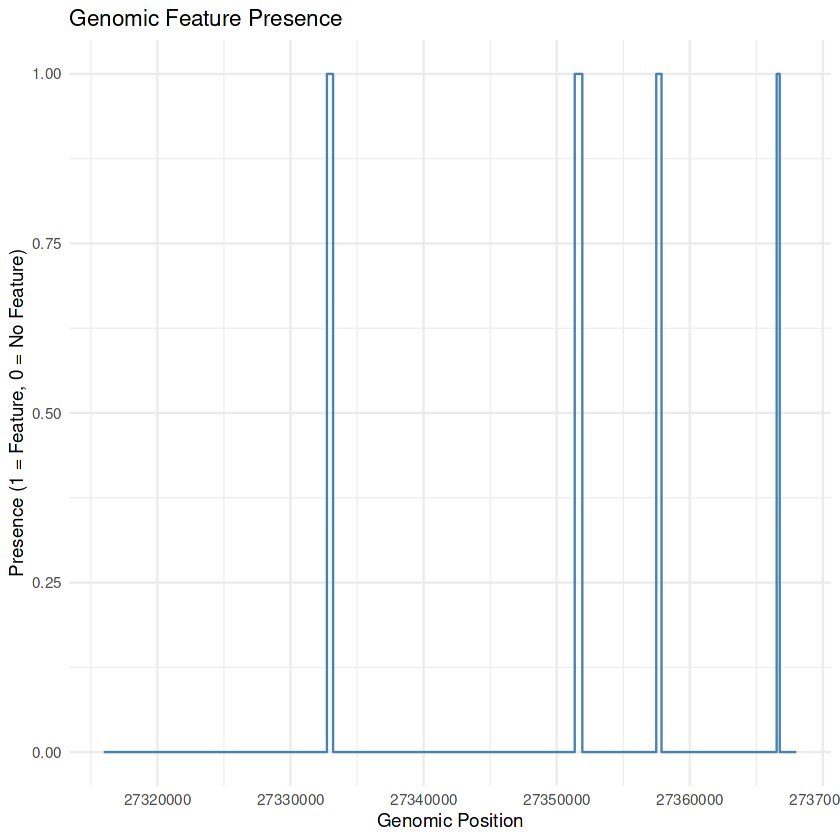

In [31]:
# Load necessary libraries
library(rtracklayer)

# Define the path to your BigBed file
bigbed_file <- "/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_1/bedtracks/ctcfbed/ENCFF095JYT.bigBed"

# Define the range of interest, for example, chromosome 1 from 27315972 to 27367998
chrom <- "chr1"
region_start <- 27315972
region_end <- 27367998
region_length <- region_end - region_start + 1

# Initialize a binary matrix (vector) of zeros for the specified range
binary_matrix <- rep(0, region_length)

# Import the BigBed file
subset_granges <- import(bigbed_file, which=REGION)

subset_granges 
# Subset the GRanges object to the range of interest

# Check if the subset contains any features
if (length(subset_granges) == 0) {
  stop("No features found in the specified range of interest.")
}

# Convert the GRanges object to a data frame for easier manipulation
subset_df <- as.data.frame(subset_granges)

# Define a binary matrix (vector) of zeros for the specified range
region_length <- region_end - region_start + 1
binary_matrix <- rep(0, region_length)

# Iterate over each row in the dataframe to set corresponding positions in the binary matrix to 1
for (i in 1:nrow(subset_df)) {
  # Get the start and end of the feature relative to the range of interest
  feature_start <- max(subset_df$start[i], region_start) - region_start + 1
  feature_end <- min(subset_df$end[i], region_end) - region_start + 1
  
  # Set the positions in the binary matrix to 1
  binary_matrix[feature_start:feature_end] <- 1
}

# Create a data frame for visualization
binary_data <- data.frame(
  Position = seq(region_start, region_end),
  Presence = binary_matrix
)

# Plot the binary matrix with ggplot2
ggplot(binary_data, aes(x = Position, y = Presence)) +
  geom_line(color = "steelblue") +
  labs(title = "Genomic Feature Presence", x = "Genomic Position", y = "Presence (1 = Feature, 0 = No Feature)") +
  theme_minimal()